# Demonstration of  Time Series Forecasting (Electricity Production Dataset)--ARIMA(-X ),SARIMA(-X) -- Data Preparation/Preprocessing -- Statistical Stationarity

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*The scope of this project is to demonstrate the use of **ARIMA-(X)** and **SARIMA(-X)** models to fit data obtained from an 'Electricity Production' dataset('.csv' file format) and to forecast the future values of this time series. The first part of this demonstration (**PART I**) is focused on data preparation/manipulation of the imported dataset features to apply all necessary data preprocessing/cleaning methods by converting the dataset into a dataframe (pandas). In addition, basic exploratory analysis is provided to highlight key aspects of the time series ('Monthly Electricity Production Output') with respect to its past behavior, so as to get meaningful insights with respect to its distribution and its behavior when grouped at different time periods. Moreover, the stationarity of the time series is tested (stationary or non stationary), as it represents the change of its statistical properties over time (use of rolling mean and standard deviation, Augmented Dickey–Fuller(ADF) test, decomposition,shifting and differencing).*

*In the second part of this project (**Part II**), the fitting and forecasting capabilities of the Autoregressive Moving Average model (**ARIMA**) are investigated. The order for each part of the model is determined either by autocorrelation (MA) and partial autocorrelation (AR) or based on the Akaike Information Criterion for a range of orders(0 to 5). Dataset is split into fitting & test samples, the **ARIMA** model fits the samples and then performs two types of 24 month forecasts. In terms of the first type of forecast, there is presence of test data to compare the target values with the forecasted 'Mean Monthly Electricity Production Output' values, whereas in the second forecast, the model forecasts the future values of the time series (no presence of test samples for evaluation of the model performance). The same type of forecasts are performed by the **ARIMAX** model, which is similar to **ARIMA**, with the only difference being the presence of an additional feature termed as 'exogenous input. Since the current dataset does not comprise another feature to be used as the exogenous input of the model, this input has been generated (random uniformly distributed variable).* 

*In the final section of this project (**Part III**), the fitting and forecasting capabilities of the Seasonal Autoregressive Moving Average model (**SARIMA-X**) are investigated by applying the same type of forecasts as in **Part II**. The difference is that **SARIMA-X** model takes into account the seasonality of the time series and comprises a seasonal component which  indicates the length of the seasonal pattern (in this example,equal to 12 months). The evaluation of  **ARIMA-X** and **SARIMA-X** performance, for cases of known prediction horizon, is based on the comparison of the forecasted values with the expected values (Performance Metric --> Root Mean Squared Error and its distribution (KDE) plot).*

**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Electricity Production*" -- File: "Electric_Production.csv" -- Source:https://www.kaggle.com/shenba/electricity-production

# Part I
## a) Data Preparation/Exploratory

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset as pandas dataframe
dataset=pd.read_csv('Electric_Production.csv')

In [3]:
# Dataset consists of 2 columns of 'object' and 'float' data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE          397 non-null object
IPG2211A2N    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
# Renaming dataset columns
dataset.rename(columns={'DATE':'Date','IPG2211A2N':'Monthly_Prod_Out'},inplace=True)

In [5]:
# Checking for 'NaN' entries
dataset.isnull().sum()

Date                0
Monthly_Prod_Out    0
dtype: int64

In [6]:
# Last 2 records of 'Date' column
dataset['Date'].tail(2)

395    12/1/2017
396     1/1/2018
Name: Date, dtype: object

In [7]:
# Since 2018 does not have 12 month entries (only January entry), the last dataset row is dropped
dataset=dataset.drop(index=396, axis=0)

In [8]:
# The 2018-01-01 entry has been removed from the dataset
dataset.tail(2)

,Date,Monthly_Prod_Out
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [9]:
# Creating a copy of the dataset
data=dataset.copy()

In [10]:
# Use of pd.to_datetime function to convert the 'Date' feature into 'datetime' data type
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format = True)

In [11]:
# Setting the 'Date' column as dataset index
data=data.set_index('Date')

In [12]:
# Shape of Dataset
data.shape

(396, 1)

In [13]:
# Dataset first 5 records
data.head()

,Monthly_Prod_Out
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [14]:
# Dataset last 5 records
data.tail()

,Monthly_Prod_Out
Date,
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212


In [15]:
# Summary statistics of Monthly Production Output feature
data.describe()

,Monthly_Prod_Out
count,396.000000
mean,88.744799
std,15.271215
min,55.315100
25%,77.016925
50%,89.768100
75%,100.460050
max,124.254900


In [16]:
# The original dataframe named as 'dataset' is used for exploratory purposes
# 'Date' column is converted from 'object' data type to 'datetime' 
dataset['Date']=pd.to_datetime(dataset['Date'])
# Feature Engineering is applied to extract the Months and Years from the 'Date' column
dataset['Year'] = dataset['Date'].apply(lambda date:date.year)
dataset['Month'] = dataset['Date'].apply(lambda date:date.month)
dataset.head()

,Date,Monthly_Prod_Out,Year,Month
0,1985-01-01,72.5052,1985,1
1,1985-02-01,70.6720,1985,2
2,1985-03-01,62.4502,1985,3
3,1985-04-01,57.4714,1985,4
4,1985-05-01,55.3151,1985,5


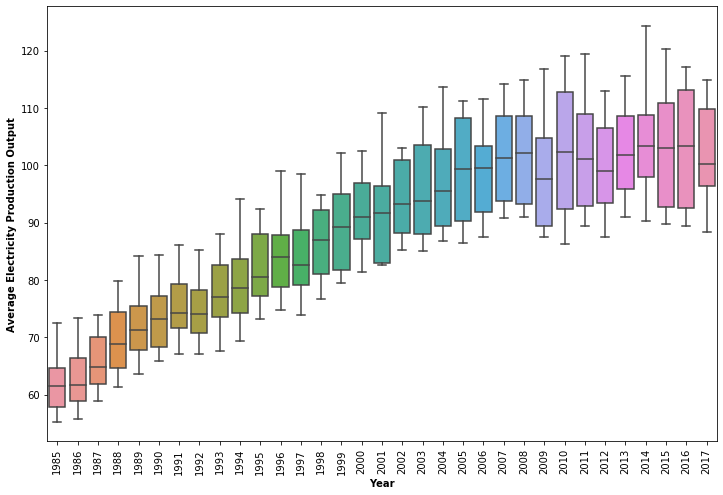

In [17]:
# Boxplot presenting the behavior of Mean Electricity Production Output when grouped by year
plt.figure(figsize=(12,8))
sns.boxplot(x='Year',y='Monthly_Prod_Out',data=dataset)
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Average Electricity Production Output',fontweight='bold')
plt.xticks(rotation=90);

In [18]:
# Average Electricity Production Output summary statistics grouped by Year
dataset.groupby('Year')['Monthly_Prod_Out'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1985,12.0,62.165667,5.746613,55.3151,57.868225,61.51740,64.615000,72.5052
1986,12.0,62.709892,5.317393,55.8137,58.889325,61.61130,66.320850,73.3057
1987,12.0,65.740275,4.858488,58.8734,61.942950,64.86255,70.063225,73.8152
1988,12.0,69.716358,5.990256,61.4065,64.651650,68.90400,74.338700,79.8703
1989,12.0,71.895167,6.053921,63.6892,67.822525,71.32880,75.454150,84.1949
1990,12.0,73.313433,5.513634,65.8218,68.284000,73.12870,77.122050,84.3598
1991,12.0,75.111850,5.568066,67.1500,71.591500,74.20955,79.242800,86.0214
1992,12.0,75.120908,5.884267,67.1784,70.816875,74.01335,78.172150,85.2855
1993,12.0,77.678992,6.583194,67.6762,73.511725,77.03890,82.635700,87.9464


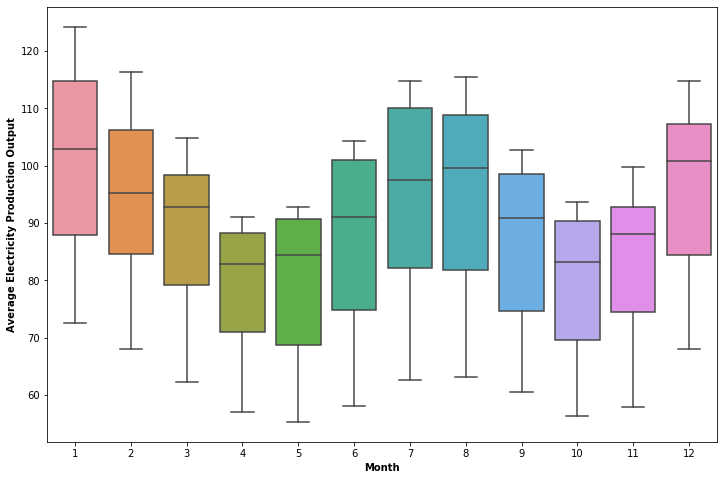

In [19]:
# Boxplot presenting the behavior of Mean Electricity Production Output when grouped by month (1 to 12-->Jan to Dec)
plt.figure(figsize=(12,8))
sns.boxplot(x='Month',y='Monthly_Prod_Out',data=dataset)
plt.xlabel('Month',fontweight='bold')
plt.ylabel('Average Electricity Production Output',fontweight='bold');

In [20]:
# Average Electricity Production Output summary statistics grouped by Month
dataset.groupby('Month')['Monthly_Prod_Out'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,33.0,101.272830,15.552624,72.5052,87.9464,102.9955,114.8331,124.2549
2,33.0,94.095521,13.867963,67.9869,84.5561,95.2075,106.1590,116.3788
3,33.0,87.902691,12.755554,62.2221,79.2456,92.8283,98.4017,104.7631
4,33.0,79.134518,10.833239,57.0329,70.9749,82.9150,88.1973,91.0092
5,33.0,79.414367,12.214435,55.3151,68.8162,84.4552,90.7369,92.7603
6,33.0,87.415906,14.662248,58.0904,74.8448,91.0406,100.9676,104.3538
7,33.0,94.944915,16.166951,62.6202,82.1048,97.4903,110.1480,114.7068
8,33.0,95.169848,15.960450,63.2485,81.8872,99.5534,108.9312,115.5159
9,33.0,86.484391,13.374102,60.5846,74.6031,90.9178,98.6154,102.7637


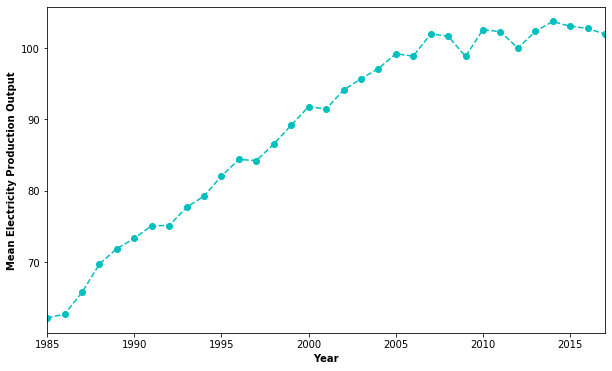

In [21]:
# Mean Yearly Electricity Production Output. As it can be observed, the time series had an increasing trend from 1985 to
# 2007, whereas from 2008 to 2017 the trend seems to have reached a plateau.
plt.figure(figsize=(10,6))
dataset.groupby('Year').mean()['Monthly_Prod_Out'].plot(marker='o',linestyle='--',color='c')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Mean Electricity Production Output',fontweight='bold')
plt.xlim(1985,2017);

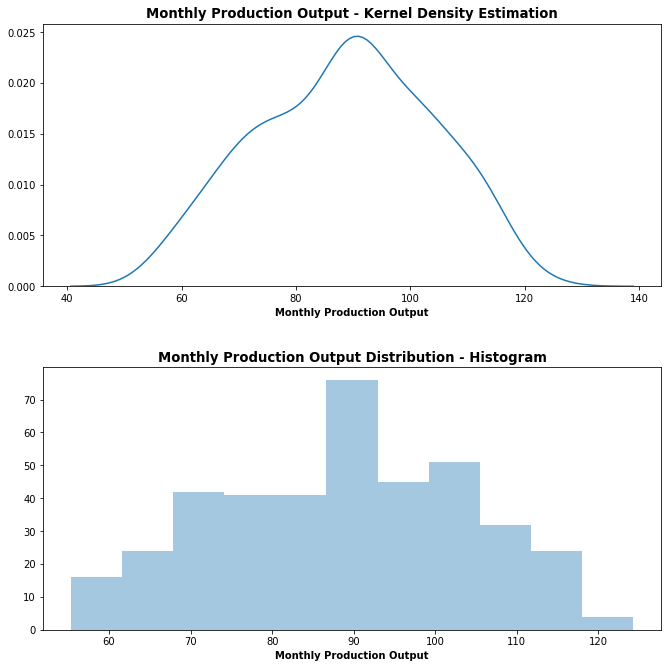

In [22]:
# 1st plot) Monthly Production Output Kernel Density Estimation plot
# 2nd plot) Monthly Production Output distribution - Histogram plot
fig,axs=plt.subplots(2,1,figsize=(10,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=11
sns.distplot(data['Monthly_Prod_Out'],kde=True,hist=False,ax=axs[0])
axs[0].set_title('Monthly Production Output - Kernel Density Estimation',fontweight='bold')
sns.distplot(data['Monthly_Prod_Out'],kde=False,hist=True,ax=axs[1])
axs[1].set_title('Monthly Production Output Distribution - Histogram',fontweight='bold')
for ax in axs.flat:
    ax.set_xlabel('Monthly Production Output',fontweight='bold')
    ax.figure.tight_layout(pad=3)

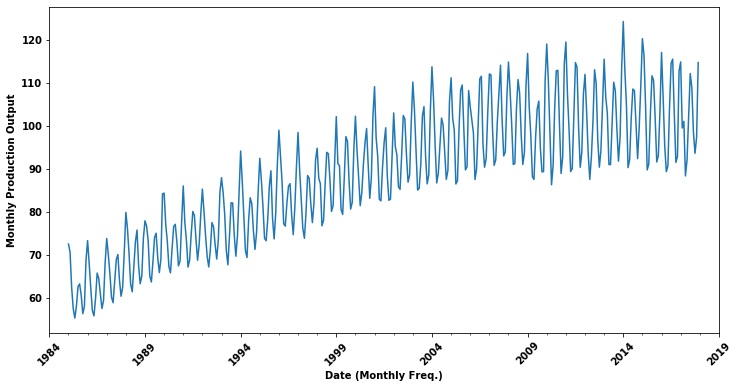

In [23]:
# Monthly Production Output Time series
plt.figure(figsize=(12,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=10
data['Monthly_Prod_Out'].plot()
plt.xlim('1984-01-01','2019-01-01')
plt.xlabel('Date (Monthly Freq.)',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.xticks(rotation=45);

##  b) Time Series Statistical Properties Behavior Over Time

In [24]:
# Rolling statistics for a window of 12 months in order to observe how the statistical properties (mean,st_dev) of the
# Monthly Production Output time series change over time (stationary /non stationary)
rolling_mean=data.rolling(window=12).mean()
rolling_st_dev=data.rolling(window=12).std()

print('Rolling mean values: ',rolling_mean)
print('Rolling standard deviation values: ',rolling_st_dev)

Rolling mean values:              Monthly_Prod_Out
Date                        
1985-01-01               NaN
1985-02-01               NaN
1985-03-01               NaN
1985-04-01               NaN
1985-05-01               NaN
1985-06-01               NaN
1985-07-01               NaN
1985-08-01               NaN
1985-09-01               NaN
1985-10-01               NaN
1985-11-01               NaN
1985-12-01         62.165667
1986-01-01         62.232375
1986-02-01         62.008617
1986-03-01         61.989608
1986-04-01         61.953067
1986-05-01         61.994617
1986-06-01         62.145458
1986-07-01         62.407567
1986-08-01         62.510325
1986-09-01         62.544983
1986-10-01         62.646383
1986-11-01         62.758150
1986-12-01         62.709892
1987-01-01         62.752350
1987-02-01         62.925275
1987-03-01         63.207600
1987-04-01         63.468075
1987-05-01         63.723050
1987-06-01         64.055658
...                      ...
2015-07-01        103

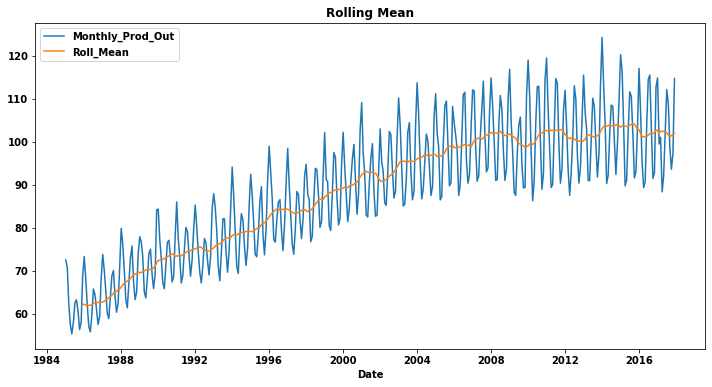

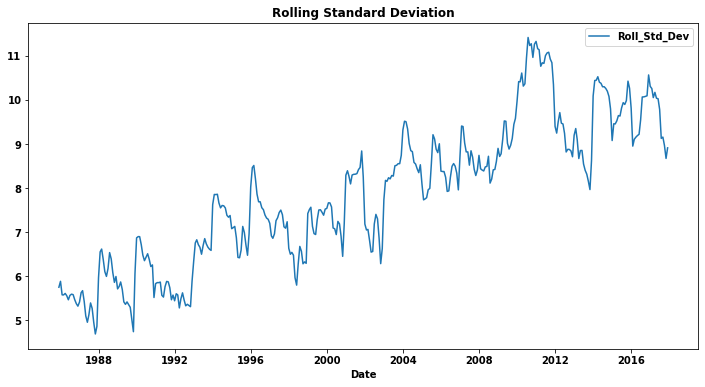

In [25]:
# By plotting the Monthly Production Output dataset, the rolling mean and rolling standard deviation, it can be stated that
# the time series is non stationary as the rolling mean is not constant(upward trend).Rolling st_deviation is also not
# constant(increasing trend with fluctuations)

plt.figure(figsize=(12,6))
orig = plt.plot(data['Monthly_Prod_Out'], label='Monthly_Prod_Out')
roll_mean = plt.plot(rolling_mean,label='Roll_Mean')
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.title('Rolling Mean',fontweight='bold')

plt.figure(figsize=(12,6))
roll_std_dev = plt.plot(rolling_st_dev, label='Roll_Std_Dev')
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.title('Rolling Standard Deviation',fontweight='bold')
plt.show()


In [26]:
# The Augmented Dickey–Fuller(ADF) test is employed so as to determine whether the Monthly Production Output time series is 
# stationary or not based on the null hypothesis that the time series is non stationary
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(data['Monthly_Prod_Out'],autolag='AIC')
test_output=pd.Series(adf_test[0:3],index=['Test_Statistic','p-Val','Lag'])
for key,value in adf_test[4].items():
    test_output['Critical_Value (%s)' %key]=value
    
# As it can be observed from the test output results, the null hypothesis cannot be rejected for the 'Monthly_Prod_Out' 
# time series as its test statistic value is higher than the Critical Values of 1% and 5% (non stationary for the
# corresponding confidence intervals)
test_output=pd.DataFrame([test_output],
                        index=['Monthly_Prod_Out'])

test_output

,Test_Statistic,p-Val,Lag,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Monthly_Prod_Out,-2.581844,0.096808,15.0,-3.447676,-2.869176,-2.570838


In [27]:
# Differencing is applied in order to reduce the series dependency on time by eliminating seasonality and trend. Data
# shifting of 1 period is selected and with differencing the change from one period to another is determined for all
# series values
datadiff=data-data.shift(periods=1)
# The entries have successfully been shifted and the value corresponding to the first entry(period of 1) has been removed.
datadiff.head()

,Monthly_Prod_Out
Date,
1985-01-01,NaN
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563


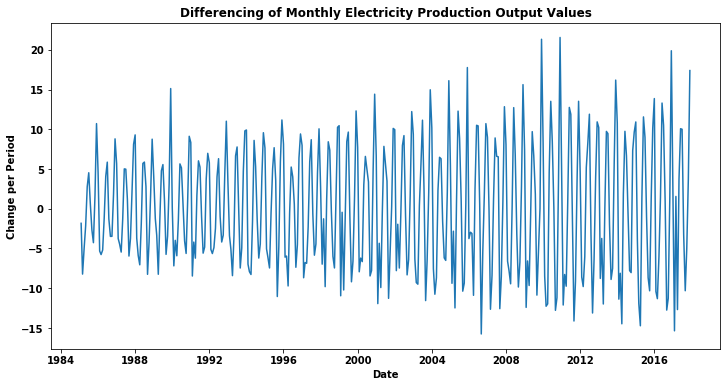

In [28]:
# Plot of the differenced time series
datadiff.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(datadiff)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Change per Period',fontweight='bold')
plt.title('Differencing of Monthly Electricity Production Output Values',fontweight='bold')
plt.show()

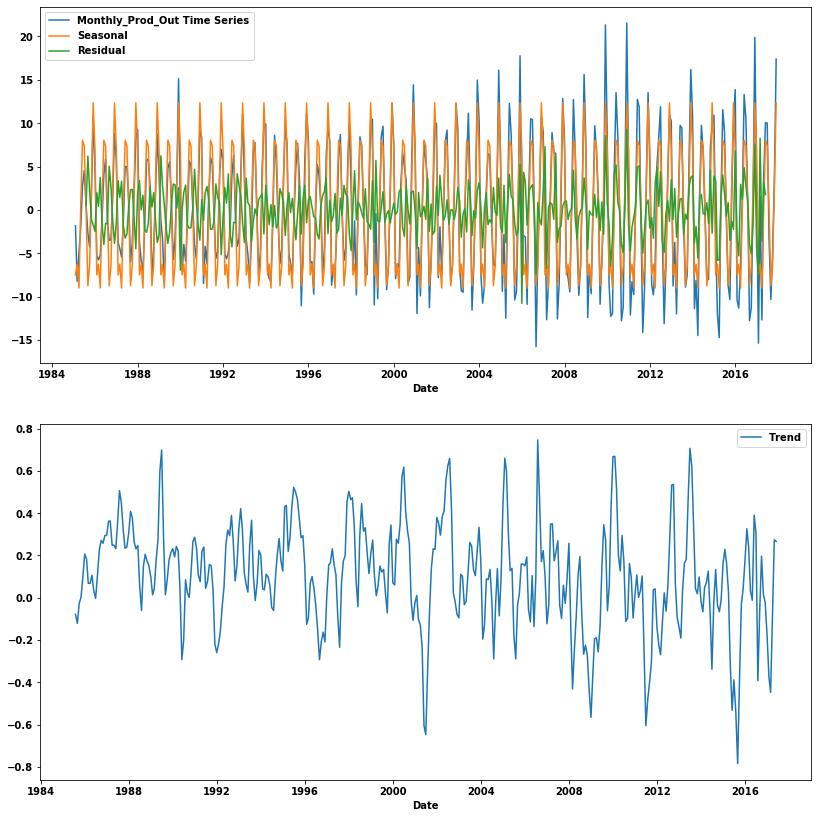

In [29]:
# Time series decomposition so as to deconstruct the differenced 'Monthly_Prod_Out feature' into components such as
# trend, seasonality and residuals

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(datadiff) 

series_trend = decomp.trend
series_seasonality = decomp.seasonal
series_residual = decomp.resid
series_residual.dropna()
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(datadiff, label='Monthly_Prod_Out Time Series')

plt.legend()

plt.subplot(211)
plt.plot(series_seasonality, label='Seasonal')
plt.legend()

plt.subplot(211)
plt.plot(series_residual, label='Residual')
plt.xlabel('Date',fontweight='bold')
plt.legend()

plt.subplot(212)
plt.plot(series_trend, label='Trend')
plt.xlabel('Date',fontweight='bold')
plt.legend()
plt.tight_layout(3)
plt.show()

In [30]:
# As it can be observed from the test output results, the null hypothesis can be rejected for the 'Monthly_Prod_Out' 
# time series as its test statistic value is less than all critical values (p-value is also very small), thus the  
# differenced time series is stationary.

adf_test=adfuller(datadiff['Monthly_Prod_Out'],autolag='AIC')
test_output=pd.Series(adf_test[0:3],index=['Test_Statistic','p-Val','Lag'])
for key,value in adf_test[4].items():
    test_output['Critical_Value (%s)' %key]=value
    
test_output=pd.DataFrame([test_output],
                        index=['Monthly_Prod_Out'])

test_output

,Test_Statistic,p-Val,Lag,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Monthly_Prod_Out,-7.25462,1.743916e-10,14.0,-3.447676,-2.869176,-2.570838


# Part II.    **ARIMA-(X)**

### Case Study I -ARIMA

In [31]:
# Importing necessary libraries for auto and partial correlation plots
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

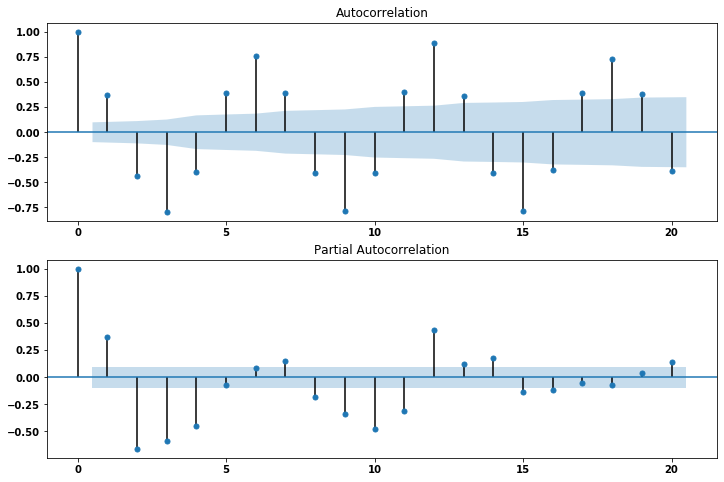

In [95]:
# The autocorrelation and the partial autocorrelation plots are used to determine the orders of the moving average and
# the autoregressive parts of the ARIMA model respectively. As it can be observed from the partial autocorrelation plot, 
# for up to 20 lags, the partial autocorrelation falls inside the 'zero' value interval (or its values are very close to 
# that interval) for orders >13, whereas for orders <=12 the partial autocorrelation fluctuates. In addition, the
# exponential decrease of the partial autocorrelation crosses the zero axis ('shuts down') approximately at a point between 
# lags 1 & 2, and in order to avoid the use of very high orders(>12), the order equal to lag = 2 is selected as it is of
# higher correlation value compared to lag=1.
# With respect to the autocorrelation plot (that is used to determine the order of the moving average of the ARIMA model),
# its trend is similar to the partial autocorrelation plot,as its value fluctuates for lags 1-20. The exponential decrease
# of the autocorrelation crosses the zero axis at a point between lags 1 & 2, thus the order of the moving average part
#  of ARIMA is selected based on the correlation for lag = 2.
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff,lags=20,ax=axes1)
axes2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff,lags=20,ax=axes2)

In [33]:
# Dataset shape
data.shape

(396, 1)

In [34]:
# Splitting the dataset into fit(372) and test samples (24)
data_new=data.copy()
fit=data_new[:372]
test=data_new[372:]
print(fit.shape,test.shape)

(372, 1) (24, 1)


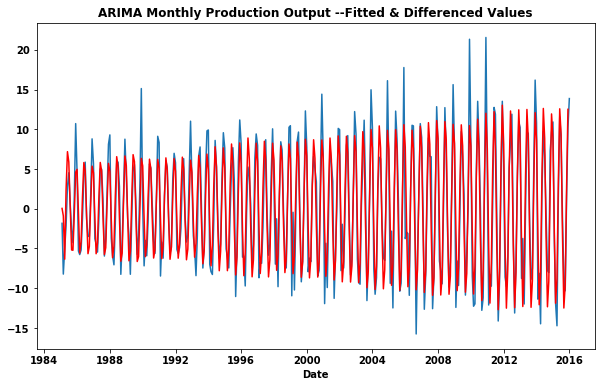

In [35]:
# ARIMA model used for fitting the first 372 data samples. the ARIMA order (p,d,q) values are (2,1,2), where p and q are
# the aforementioned orders of the Autoregressive and the Moving Average parts of the ARIMA, and 'd' stands for the
# differencing (equal to 1 since only the first difference has been determined)
# The remaining 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(fit, order=(2,1,2))
ARIMA_Model = model.fit()
plt.figure(figsize=(10,6))
plt.plot(datadiff[:372])
plt.xlabel('Date',fontweight='bold')
plt.plot(ARIMA_Model.fittedvalues, color='red')
plt.title('ARIMA Monthly Production Output --Fitted & Differenced Values',fontweight='bold');

In [36]:
# Forecasting the monthly electricity production output for the next 24 months. It needs to be mentioned that in this
# example there is presence of test data (from 2016-01 to 2017-12) to compare the forecasted with the target values
model_pred=ARIMA_Model.forecast(steps=24)
# ARIMA forecasts
model_pred[0]

array([113.15296428, 110.73974224,  98.43680508,  88.59102822,
        91.0918809 , 103.48096787, 113.41067065, 110.99300105,
        98.68857827,  88.8457635 ,  91.35106359, 103.74163544,
       113.66837554, 111.24625867,  98.94035176,  89.10050026,
        91.61024747, 104.00230271, 113.92607894, 111.49951511,
        99.19212554,  89.35523851,  91.86943253, 104.26296969])

In [37]:
# Creating an index for the 24 month forecasts. Predicted values index is the same with the test values index
from pandas.tseries.offsets import DateOffset
Future_Months=[fit.index[-1]+ DateOffset(months=x)for x in range(1,25)]
print('Prediction Horizon:',len(Future_Months))
print('Test_Values -- Start & End Date:',test.index[0],test.index[-1])
print('Predicted_Values -- Start & End Date:',Future_Months[0],Future_Months[-1])

Prediction Horizon: 24
Test_Values -- Start & End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00
Predicted_Values -- Start & End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00


In [38]:
# Pandas dataframe of the forecasted values
ARIMA_pred=model_pred[0]
ARIMA_pred_data=pd.DataFrame(index=Future_Months,data=ARIMA_pred,columns=['ARIMA Predictions'])
ARIMA_pred_data.head()

,ARIMA Predictions
2016-01-01,113.152964
2016-02-01,110.739742
2016-03-01,98.436805
2016-04-01,88.591028
2016-05-01,91.091881


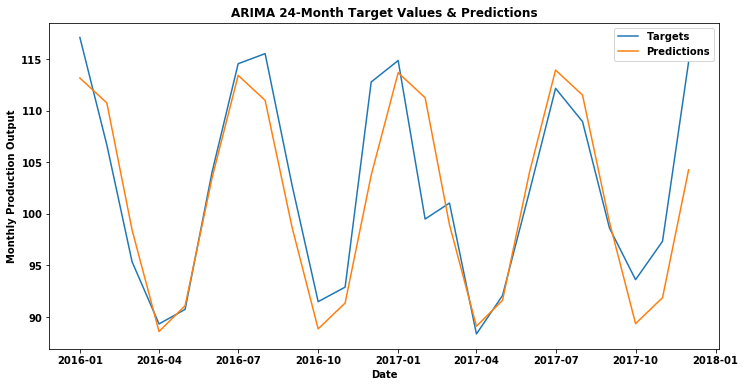

In [39]:
# Plot of test vs. predicted ARIMA values
plt.figure(figsize=(12,6))
plt.plot(test,label='Targets')
plt.plot(ARIMA_pred_data,label='Predictions')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMA 24-Month Target Values & Predictions',fontweight='bold')
plt.legend();

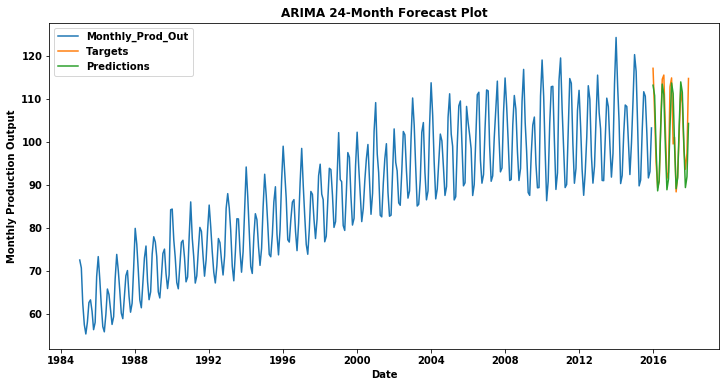

In [40]:
# Plot of fit samples, Test samples and ARIMA predictions
plt.figure(figsize=(12,6))
plt.plot(fit,label='Monthly_Prod_Out')
plt.plot(test,label='Targets')
plt.plot(ARIMA_pred_data,label='Predictions')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMA 24-Month Forecast Plot',fontweight='bold')
plt.legend();

In [41]:
# Root Mean Squared Error of target and predicted values
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test,ARIMA_pred_data))
RMSE

4.506246435472901

In [42]:
# Summary statistics of the Prediction Error
pred_error_RMSE=np.sqrt((test.values-ARIMA_pred_data.values)**2)
pred_error_RMSE=pd.DataFrame(pred_error_RMSE,columns=['Prediction Error'])
pred_error_RMSE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prediction Error,24.0,3.286213,3.149668,0.354981,1.033647,2.333782,4.120957,11.756159


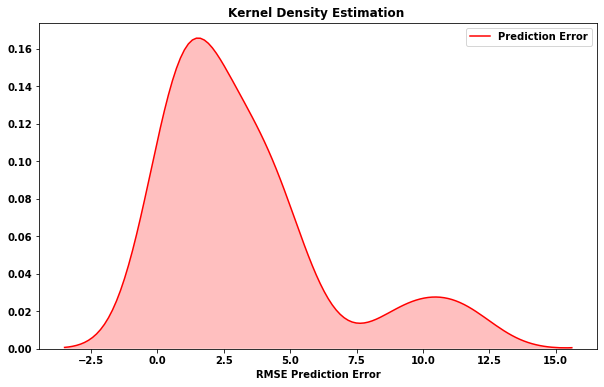

In [43]:
# Distribution of the Prediction Error
plt.figure(figsize=(10,6))
sns.kdeplot(pred_error_RMSE['Prediction Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('RMSE Prediction Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

## ARIMA 
### Case Study II

In [44]:
# In this case study, different p(AR),d(I),q(MA) orders are tested (range(0,5)) and the final values are determined 
# by use of the Akaike Information Criterion(AIC), where lower AIC values indicate better model fit. 
# Note: (p,d,q) values that affect the stationarity of the time series (non stationary time series) are excluded
import itertools
AR=I=MA=range(0,5)
arima=list(itertools.product(AR,I,MA))
pdq=[]
for values in arima:
    
    try:
        
        model = ARIMA(fit, order=values)
        ARIMA_Model = model.fit()
        x=(values,ARIMA_Model.aic)
        
        pdq.append(x)
        print(pdq[-1])

    except:
        continue

((0, 0, 0), 3081.4366541183053)
((0, 0, 1), 2698.6335604945116)
((0, 0, 3), 2384.0235617483922)
((0, 0, 4), 2343.0745872048565)
((0, 1, 0), 2555.7252027201985)
((0, 1, 1), 2432.5930651579183)
((0, 1, 2), 2424.245459178308)
((0, 1, 3), 2263.0133923268368)
((0, 2, 0), 2627.5326930346914)
((0, 2, 1), 2610.3608560979937)
((0, 2, 2), 2434.03632453722)
((0, 2, 3), 2425.2157298598895)
((1, 0, 0), 2542.330090951411)
((1, 0, 1), 2402.706908283033)
((1, 0, 2), 2365.023269061531)
((1, 0, 3), 2286.690325659185)
((1, 0, 4), 2267.1850079435953)
((1, 1, 0), 2499.4845587304435)
((1, 1, 1), 2472.7543525115752)
((1, 1, 3), 2262.972775874928)
((1, 2, 0), 2619.598668985229)
((1, 2, 3), 2304.923443914366)
((2, 0, 0), 2450.925912160486)
((2, 0, 1), 2391.799979352809)
((2, 0, 2), 2331.0845302489743)
((2, 0, 3), 2286.2843284702403)
((2, 0, 4), 2232.671131679275)
((2, 1, 0), 2269.926481996522)
((2, 1, 2), 1959.6200512722062)
((2, 1, 3), 1953.490380072948)
((2, 2, 0), 2558.986325760028)
((2, 2, 3), 1967.4635298

In [45]:
# Best fit(lowest AIC value) has been estimated for p=3,d=1 and q=4
pdq=pd.DataFrame(pdq)
pdq.columns=['Orders','ARIMA_AIC']
pdq['Orders'][pdq['ARIMA_AIC']==pdq['ARIMA_AIC'].min()].values

array([(3, 1, 4)], dtype=object)

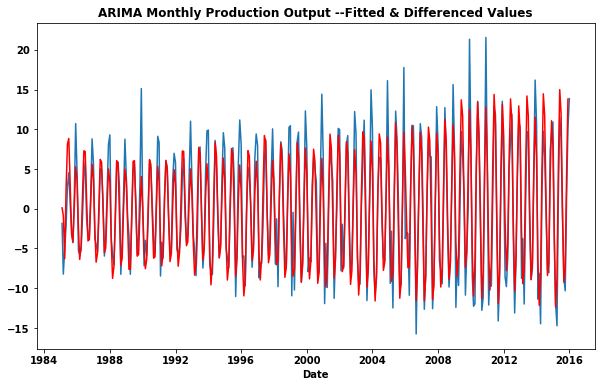

In [46]:
# ARIMA for fitting the first 372 samples based on the estimated order values
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(fit, order=(3,1,4))
ARIMA_Model = model.fit()
plt.figure(figsize=(10,6))
plt.plot(datadiff[:372])
plt.xlabel('Date',fontweight='bold')
plt.plot(ARIMA_Model.fittedvalues, color='red')
plt.title('ARIMA Monthly Production Output --Fitted & Differenced Values',fontweight='bold');

In [47]:
# Forecasting the monthly electricity production output for the next 24 months (presence of test data for comparison of
# forecasted with expected values)
model_pred=ARIMA_Model.forecast(steps=24)
# ARIMA forecasts
model_pred[0]

array([114.72695825, 113.84788486, 102.99378435,  94.3491725 ,
        97.20207635, 109.04424514, 118.24808308, 115.76565794,
       104.20699097,  95.24496114,  97.95154911, 109.73082522,
       118.91544972, 116.43168643, 104.87115055,  95.89992927,
        98.5953938 , 110.37106902, 119.56248433, 117.08879386,
       105.53140182,  96.55319067,  99.23849272, 111.01098098])

In [48]:
# Creating an index for the 24 month forecasts. Predicted values index is the same with the test values index
from pandas.tseries.offsets import DateOffset
Future_Months=[fit.index[-1]+ DateOffset(months=x)for x in range(1,25)]
print('Prediction Horizon:',len(Future_Months))
print('Test_Val Start - End Date:',test.index[0],test.index[-1])
print('Predicted_Val Start - End Date:',Future_Months[0],Future_Months[-1])

Prediction Horizon: 24
Test_Val Start - End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00
Predicted_Val Start - End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00


In [49]:
# Pandas dataframe-Arima Predicted values
ARIMA_pred=model_pred[0]
ARIMA_pred_data=pd.DataFrame(index=Future_Months,data=ARIMA_pred,columns=['ARIMA Predictions'])
ARIMA_pred_data.head()

,ARIMA Predictions
2016-01-01,114.726958
2016-02-01,113.847885
2016-03-01,102.993784
2016-04-01,94.349173
2016-05-01,97.202076


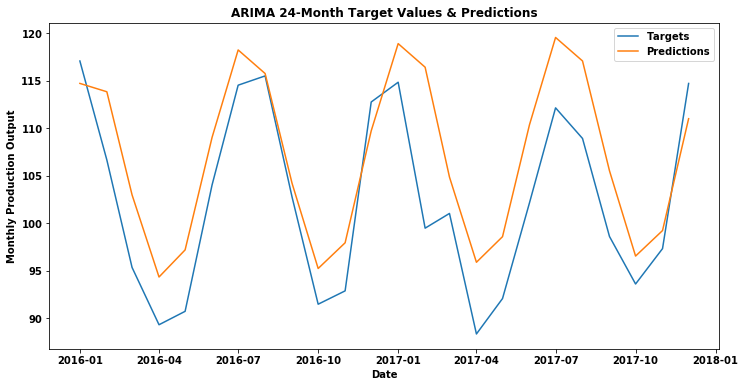

In [50]:
# Plot of test vs. predicted ARIMA values
plt.figure(figsize=(12,6))
plt.plot(test,label='Targets')
plt.plot(ARIMA_pred_data,label='Predictions')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMA 24-Month Target Values & Predictions',fontweight='bold')
plt.legend();

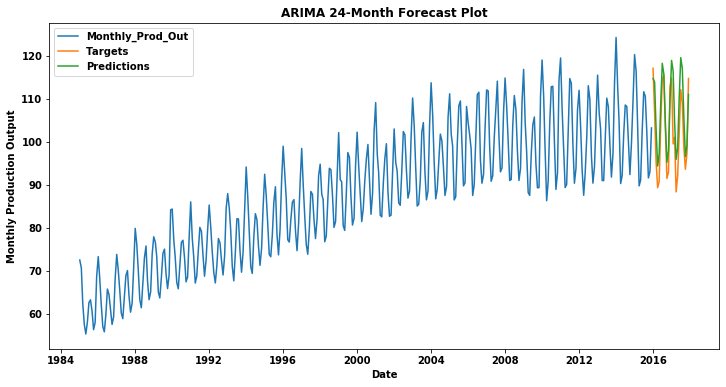

In [51]:
# Plot of fit samples, Test samples and ARIMA predictions
plt.figure(figsize=(12,6))
plt.plot(fit,label='Monthly_Prod_Out')
plt.plot(test,label='Targets')
plt.plot(ARIMA_pred_data,label='Predictions')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMA 24-Month Forecast Plot',fontweight='bold')
plt.legend();


In [52]:
# Root Mean Squared Error of target and predicted values
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test,ARIMA_pred_data))
RMSE

6.301037261133192

In [53]:
# Prediction Error summary statistics
ARIMA_pred_error_RMSE=np.sqrt((test.values-ARIMA_pred_data.values)**2)
ARIMA_pred_error_RMSE=pd.DataFrame(ARIMA_pred_error_RMSE,columns=['ARIMA Pred_Error'])
ARIMA_pred_error_RMSE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ARIMA Pred_Error,24.0,5.378445,3.353192,0.249758,3.540931,5.015259,7.236485,16.941586


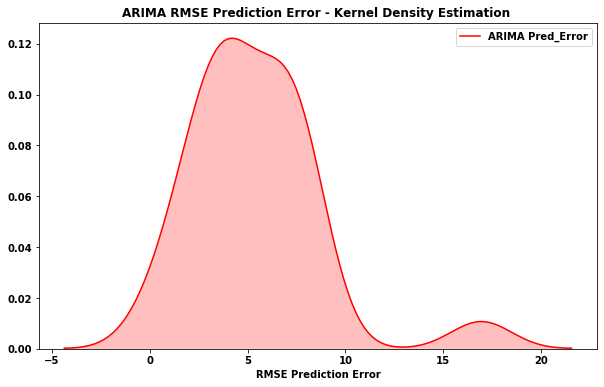

In [54]:
# Prediction Error Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(ARIMA_pred_error_RMSE['ARIMA Pred_Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('RMSE Prediction Error',fontweight='bold')
plt.title('ARIMA RMSE Prediction Error - Kernel Density Estimation ',fontweight='bold');


### Future Months Forecast - ARIMA

In [55]:
# In this case, the model is used to forecast future values (no target values to compare the accuracy of the forecasts).
# As previously presented, different p(AR),d(I),q(MA) orders are tested  and the final values are determined 
# by use of the Akaike Information Criterion(AIC), where lower AIC values indicate better model fit. ALl Monthly Production
# Output values are used for the fitting of the ARIMA model and there are no test samples
import itertools
AR=I=MA=range(0,5)
arima=list(itertools.product(AR,I,MA))
pdq=[]
for values in arima:
    
    try:
        
        model = ARIMA(data, order=values)
        ARIMA_Model = model.fit()
        x=(values,ARIMA_Model.aic)
        pdq.append(x)
        print(pdq[-1])

    except:
        continue

((0, 0, 0), 3285.7660601091543)
((0, 0, 1), 2883.4128529063023)
((0, 0, 3), 2564.6550174531894)
((0, 0, 4), 2531.6059907235795)
((0, 1, 0), 2740.5824585287355)
((0, 1, 1), 2618.005104746703)
((0, 1, 2), 2612.481615811127)
((0, 1, 3), 2439.691506701912)
((0, 2, 0), 2823.4193025032455)
((0, 2, 1), 2809.460405702299)
((0, 2, 2), 2619.4326188039954)
((0, 2, 3), 2613.4678863380313)
((1, 0, 0), 2725.6615197446345)
((1, 0, 1), 2585.1175843982173)
((1, 0, 2), 2536.404041783528)
((1, 0, 3), 2462.466374299117)
((1, 0, 4), 2445.414799612934)
((1, 1, 0), 2684.7095036900223)
((1, 1, 1), 2651.1715528435925)
((1, 1, 3), 2440.3561044762664)
((1, 1, 4), 2382.871673718447)
((1, 2, 0), 2817.298138428977)
((1, 2, 4), 2436.012317344773)
((2, 0, 0), 2633.283338552246)
((2, 0, 1), 2575.470811394853)
((2, 0, 2), 2505.576562328265)
((2, 0, 3), 2462.880010991331)
((2, 0, 4), 2445.719602834435)
((2, 1, 0), 2456.876722947524)
((2, 1, 3), 2103.1788246876167)
((2, 1, 4), 2065.625841118247)
((2, 2, 0), 2758.32351017

In [56]:
# Best fit(lowest AIC value) has been estimated for p=2,d=1 and q=4
pdq=pd.DataFrame(pdq)
pdq.columns=['Orders','ARIMA_AIC']
pdq['Orders'][pdq['ARIMA_AIC']==pdq['ARIMA_AIC'].min()].values

array([(2, 1, 4)], dtype=object)

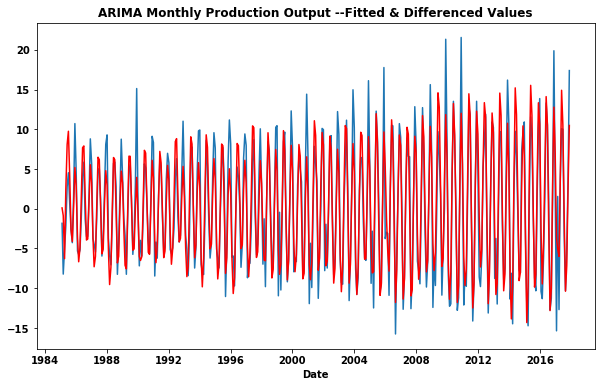

In [57]:
# Fitting the Monthly Production Output samples (no test samples)
full_model = ARIMA(data, order=(2,1,4))
full_ARIMA_Model = full_model.fit()
plt.figure(figsize=(10,6))
plt.plot(datadiff)
plt.xlabel('Date',fontweight='bold')
plt.plot(full_ARIMA_Model.fittedvalues, color='red')
plt.title('ARIMA Monthly Production Output --Fitted & Differenced Values',fontweight='bold');

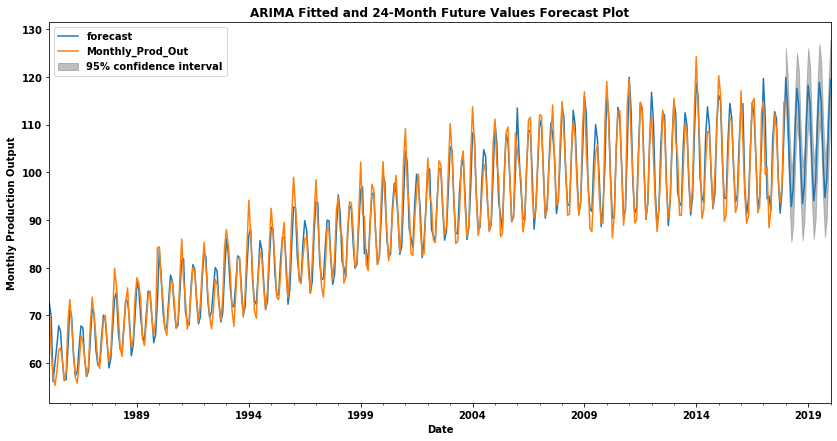

In [84]:
# Plot of the ARIMA fitted and forecasted future values - Confidence Interval of 95%
fig,ax1= plt.subplots(1,1,figsize=(14,7))
Arima_Forecast=full_ARIMA_Model.plot_predict(1,420,ax=ax1)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMA Fitted and 24-Month Future Values Forecast Plot',fontweight='bold');



# ARIMA-X

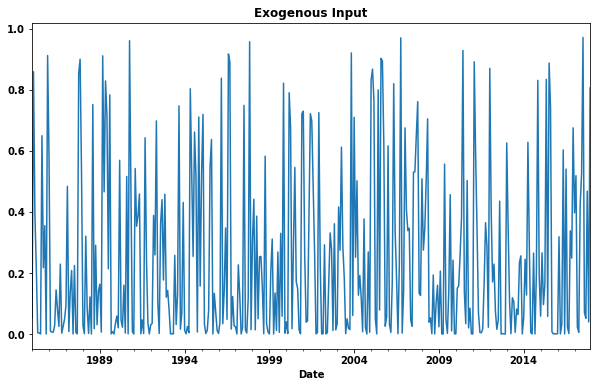

In [59]:
# ARIMA-X model is similar to ARIMA, the only difference being the presence of an exogenous input. For demonstration
# purposes, since there is no exogenous input in this particular Electricity Production dataset, an exogenous input is
# generated, that is based on a random uniform distribution 
np.random.seed(42)
ex=(np.random.rand(396)**3)
data_new['Exog_Input']=ex
plt.figure(figsize=(10,6))
data_new['Exog_Input'].plot()
plt.xlabel('Date',fontweight='bold')
plt.title('Exogenous Input',fontweight='bold');

In [60]:
# The exogenous input is now a feature of the 'data_new' dataset
data_new.head()

,Monthly_Prod_Out,Exog_Input
Date,,
1985-01-01,72.5052,0.052541
1985-02-01,70.6720,0.859310
1985-03-01,62.4502,0.392213
1985-04-01,57.4714,0.214554
1985-05-01,55.3151,0.003798


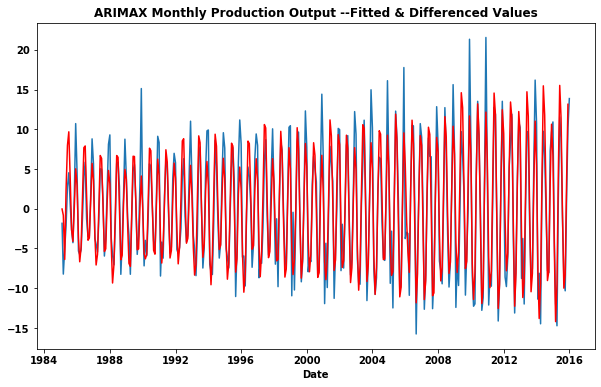

In [61]:
# Fitting of the ARIMA-X model to the data samples
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(fit, order=(2,1,4),exog=ex[:372])
ARIMA_Model = model.fit()
plt.figure(figsize=(10,6))
plt.plot(datadiff[:372])
plt.xlabel('Date',fontweight='bold')
plt.plot(ARIMA_Model.fittedvalues, color='red')
plt.title('ARIMAX Monthly Production Output --Fitted & Differenced Values',fontweight='bold');

In [62]:
# ARIMAX 24 Month Forecast
model_pred=ARIMA_Model.forecast(steps=24,exog=ex[372:])
model_pred[0]

array([113.66795017, 112.2380314 , 101.42388325,  93.42304927,
        96.27213006, 107.42037995, 115.61696287, 112.94991247,
       102.13256234,  94.06811848,  97.01003231, 108.00402214,
       116.22637204, 113.4334517 , 102.6083745 ,  94.62883369,
        97.54065899, 108.57251749, 116.65367532, 113.95466113,
       103.11994328,  95.04036129,  98.05176894, 109.02111894])

In [63]:
# Creating an index for the 24 month forecasts. Predicted values index is the same with the test values index
from pandas.tseries.offsets import DateOffset
Future_Months=[fit.index[-1]+ DateOffset(months=x)for x in range(1,25)]
print('Prediction Horizon:',len(Future_Months))
print('Test_Val Start - End Date:',test.index[0],test.index[-1])
print('Predicted_Val Start - End Date:',Future_Months[0],Future_Months[-1])

Prediction Horizon: 24
Test_Val Start - End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00
Predicted_Val Start - End Date: 2016-01-01 00:00:00 2017-12-01 00:00:00


In [64]:
# Pandas dataframe-ARIMAX Predicted values
ARIMAX_pred=model_pred[0]
ARIMAX_pred_data=pd.DataFrame(index=Future_Months,data=ARIMAX_pred,columns=['ARIMAX Predictions'])
ARIMAX_pred_data.head()

,ARIMAX Predictions
2016-01-01,113.667950
2016-02-01,112.238031
2016-03-01,101.423883
2016-04-01,93.423049
2016-05-01,96.272130


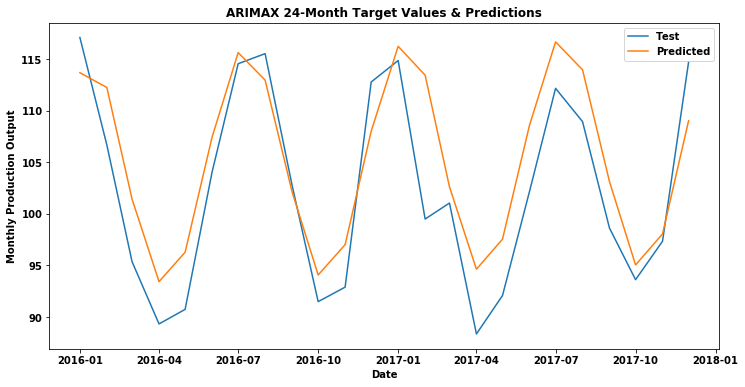

In [65]:
# ARIMAX forecasted vs. Target values
plt.figure(figsize=(12,6))
plt.plot(test,label='Test')
plt.plot(ARIMAX_pred_data,label='Predicted')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMAX 24-Month Target Values & Predictions',fontweight='bold')
plt.legend();

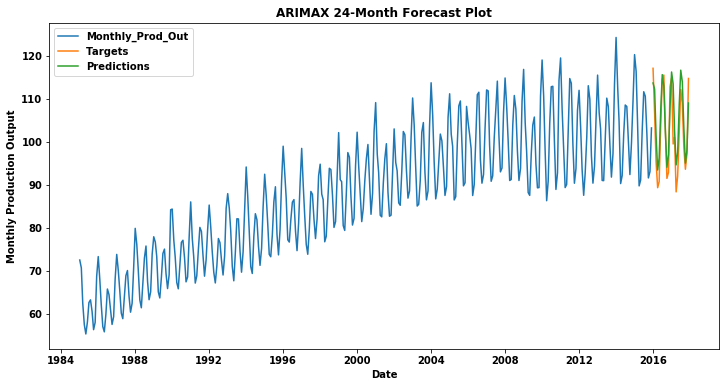

In [66]:
# Plot of fit samples, Test samples and ARIMA predictions
plt.figure(figsize=(12,6))
plt.plot(fit,label='Monthly_Prod_Out')
plt.plot(test,label='Targets')
plt.plot(ARIMAX_pred_data,label='Predictions')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMAX 24-Month Forecast Plot',fontweight='bold')
plt.legend()
plt.show()

In [67]:
# Root Mean Squared Error of target and predicted values
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test,ARIMAX_pred_data))
RMSE

5.011956832117405

In [68]:
# Summary statistics of the ARIMAX prediction RMSE error
ARIMAX_pred_error_RMSE=np.sqrt((test.values-ARIMAX_pred_data.values)**2)
ARIMAX_pred_error_RMSE=pd.DataFrame(ARIMAX_pred_error_RMSE,columns=['ARIMAX Pred_Error'])
ARIMAX_pred_error_RMSE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ARIMAX Pred_Error,24.0,4.196868,2.798635,0.631138,2.316684,4.309954,5.54373,13.943352


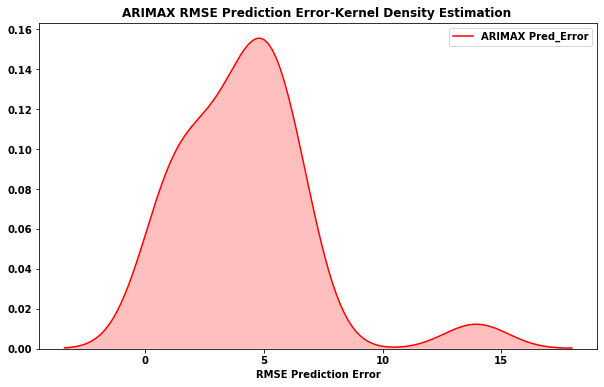

In [69]:
# Prediction Error Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(ARIMAX_pred_error_RMSE['ARIMAX Pred_Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('RMSE Prediction Error',fontweight='bold')
plt.title('ARIMAX RMSE Prediction Error-Kernel Density Estimation ',fontweight='bold');

### Future Months Forecast - ARIMAX

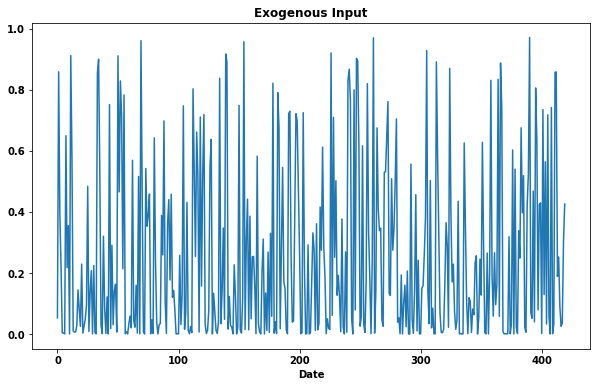

In [70]:
# Generation of a new ARIMAX exogenous input that is based on a random uniform distribution
np.random.seed(42)
exo=(np.random.rand(420)**3)

plt.figure(figsize=(10,6))
plt.plot(exo)
plt.xlabel('Date',fontweight='bold')
plt.title('Exogenous Input',fontweight='bold');

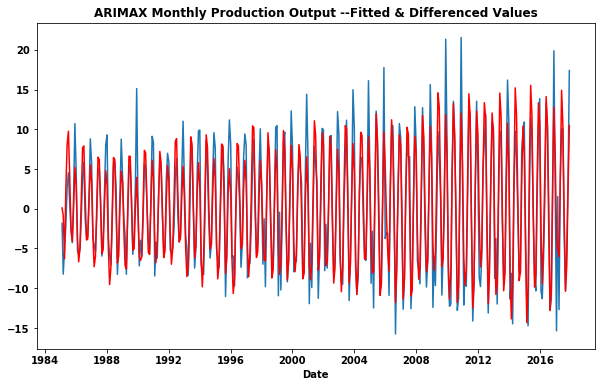

In [71]:
# Fitting of the ARIMA-X model to the data samples (comprising all 'Monthly_Prod_Out' values)
full_model = ARIMA(data['Monthly_Prod_Out'], order=(2,1,4),exog=exo[:396])
full_ARIMAX_Model = full_model.fit()
plt.figure(figsize=(10,6))
plt.plot(datadiff)
plt.xlabel('Date',fontweight='bold')
plt.plot(full_ARIMA_Model.fittedvalues, color='red')
plt.title('ARIMAX Monthly Production Output --Fitted & Differenced Values',fontweight='bold');

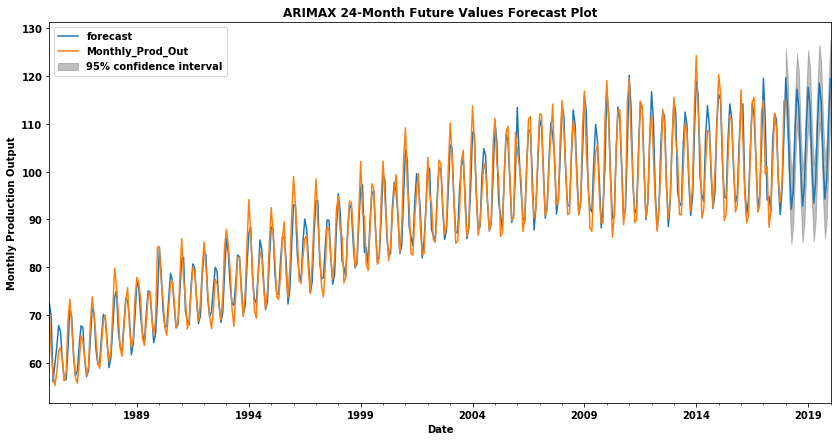

In [82]:
# Plot of the ARIMAX fitted and forecasted future values - Confidence Interval of 95%
fig,ax1= plt.subplots(1,1,figsize=(14,7))
ARIMAX_Forecast=full_ARIMAX_Model.plot_predict(1,420,exog=exo,ax=ax1)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title('ARIMAX Fitted and 24-Month Future Values Forecast Plot',fontweight='bold');


# Part III.    **SARIMA-(X)**

### Case Study I -SARIMA

In [85]:
# Seasonal Differencing is applied to reduce the series dependency on time by eliminating seasonality and trend. Data
# shifting of 12 period is selected and with differencing the change from one period to another is determined for all
# series values
datadiff_sar=data-data.shift(periods=12)
# The entries have successfully been shifted 
datadiff_sar.head(15)

,Monthly_Prod_Out
Date,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


In [86]:
# As it can be observed from the test output results, the null hypothesis can be rejected for the 'Monthly_Prod_Out' 
# time series as its test statistic value is less than all critical values (p-value is also very small), thus the  
# differenced time series is stationary.

adf_test=adfuller(datadiff_sar['Monthly_Prod_Out'].dropna(),autolag='AIC')
test_output=pd.Series(adf_test[0:3],index=['Test_Statistic','p-Val','Lag'])
for key,value in adf_test[4].items():
    test_output['Critical_Value (%s)' %key]=value
    

test_output=pd.DataFrame([test_output],
                        index=['Monthly_Prod_Out'])
test_output

,Test_Statistic,p-Val,Lag,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Monthly_Prod_Out,-5.818734,4.231832e-07,12.0,-3.4481,-2.869362,-2.570937


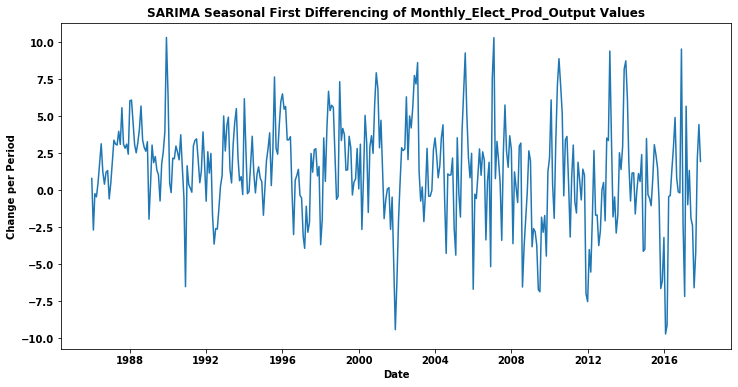

In [92]:
# Plot of the differenced time series
datadiff_sar.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(datadiff_sar)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Change per Period',fontweight='bold')
plt.title('SARIMA Seasonal First Differencing of Monthly_Elect_Prod_Output Values',fontweight='bold')
plt.show()

In [90]:
# NaN Entries have been removed
datadiff_sar.head()

,Monthly_Prod_Out
Date,
1986-01-01,0.8005
1986-02-01,-2.6851
1986-03-01,-0.2281
1986-04-01,-0.4385
1986-05-01,0.4986


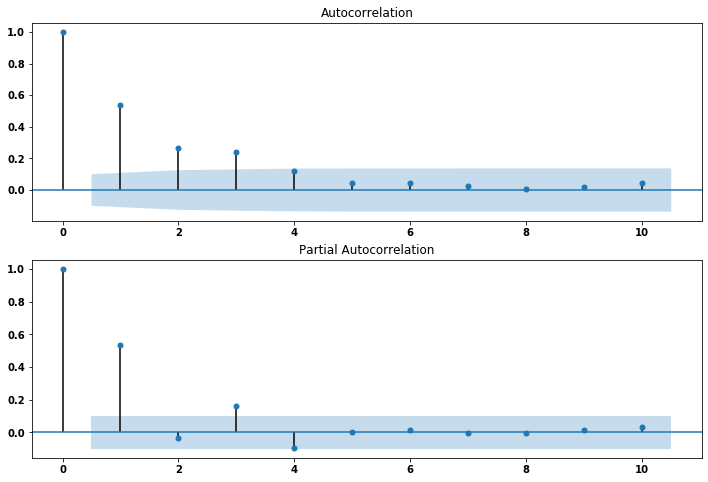

In [93]:
# The autocorrelation and the partial autocorrelation plots are used to determine the orders of the moving average and
# the autoregressive parts of the SARIMA model respectively. As it can be observed from the partial autocorrelation plot, 
# for up to 10 lags, the partial autocorrelation falls inside the 'zero' value interval (or its values are very close to 
# that interval) for orders >1, thus the order equal to lag = 1 is selected for the autoregressive part of SARIMA

# With respect to the autocorrelation plot (that is used to determine the order of the moving average of the SARIMA model),
# the exponential decrease of the autocorrelation crosses the zero confidence level for lags>3 thus the order of the
# moving average part of SARIMA is chosen to be 3.
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff_sar,lags=10,ax=axes1)
axes2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff_sar,lags=10,ax=axes2)

In [96]:
# SARIMAX for fitting the samples based on the estimated order values. The seasonal order is the same as in the ARIMA
# order with the only difference being an extra value that indicates the seasonality (12 months in this case)
model = sm.tsa.statespace.SARIMAX(fit[:372],order=(1, 1, 3),seasonal_order=(1,1,3,12))
SARIMA_Model = model.fit()


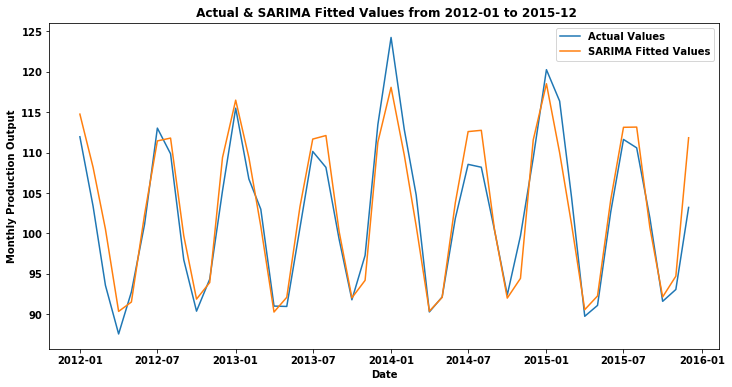

In [97]:
# To observe how well the SARIMA model has fitted the data, the last 48 Monthly_Prod_Out values(from 2012-01 to 2015-12) 
# of the actual data and the SARIMA fitted values are plotted below.
sarima_last_4_year_fitted_val=SARIMA_Model.predict(start=324,end=371,dynamic=True)
# Plot of actual vs. SARIMA fitted values 
plt.figure(figsize=(12,6))
plt.plot(fit[324:],label='Actual Values')
plt.plot(sarima_last_4_year_fitted_val,label='SARIMA Fitted Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' Actual & SARIMA Fitted Values from 2012-01 to 2015-12',fontweight='bold')
plt.legend();

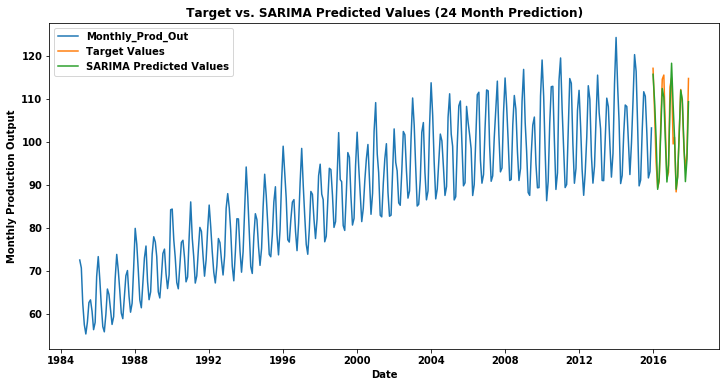

In [99]:
# To observe how accurate the SARIMA model can forecast the test 'Monthly_Prod_Out' values (target data), 
# the test data (24 months) and the SARIMA forecasted values are plotted below.
SARIMA_Prediction=SARIMA_Model.predict(start=372,end=395,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(fit,label='Monthly_Prod_Out')
plt.plot(test,label='Target Values')
plt.plot(SARIMA_Prediction,label='SARIMA Predicted Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' Target vs. SARIMA Predicted Values (24 Month Prediction) ',fontweight='bold')
plt.legend();

In [100]:
# Root Mean Squared Error of target and predicted values
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test,SARIMA_Prediction))
RMSE

3.183613843289516

In [101]:
# Prediction Error summary statistics
SARIMA_Prediction=SARIMA_Prediction.values.reshape((24,1))
SARIMA_pred_error_RMSE=np.sqrt((test.values-SARIMA_Prediction)**2)
SARIMA_pred_error_RMSE=pd.DataFrame(SARIMA_pred_error_RMSE,columns=['SARIMA Pred_Error'])
SARIMA_pred_error_RMSE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SARIMA Pred_Error,24.0,2.316266,2.231079,0.157759,0.761594,1.557598,3.011275,9.025857


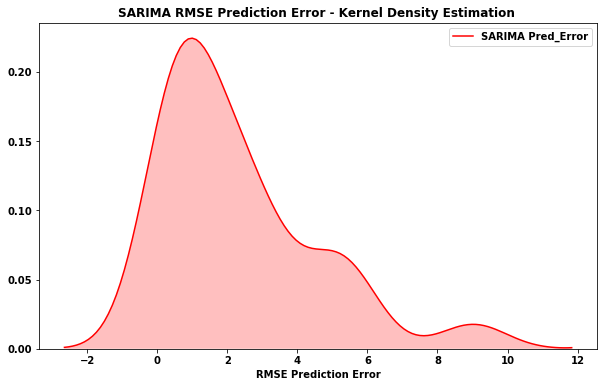

In [102]:
# SARIMA Prediction Error Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(SARIMA_pred_error_RMSE['SARIMA Pred_Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('RMSE Prediction Error',fontweight='bold')
plt.title('SARIMA RMSE Prediction Error - Kernel Density Estimation ',fontweight='bold');

In [103]:
# SARIMA for fitting all dataset samples based on the estimated order values. 
model = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 3),seasonal_order=(1,1,3,12))
SARIMA_Model = model.fit()

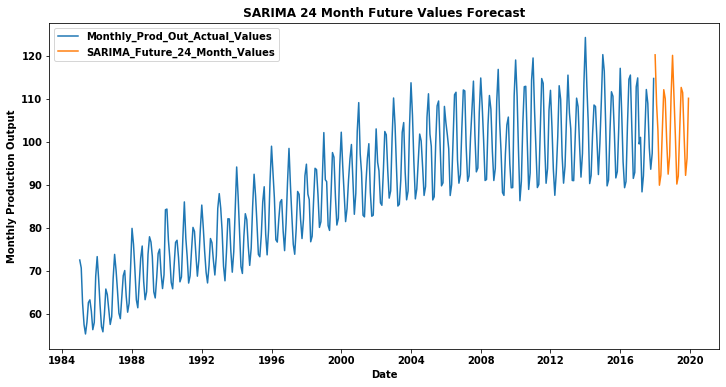

In [105]:
# To observe the future 2 Year behavior of the time series (No test data) the SARIMA model can be employed to forecast 
# the future 24 month values of the Monthly Electricity Production Output.
SARIMA_Forecast=SARIMA_Model.predict(start=396,end=419,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(data,label='Monthly_Prod_Out_Actual_Values')
plt.plot(SARIMA_Forecast,label='SARIMA_Future_24_Month_Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' SARIMA 24 Month Future Values Forecast ',fontweight='bold')
plt.legend();

### Case Study II - SARIMA-X

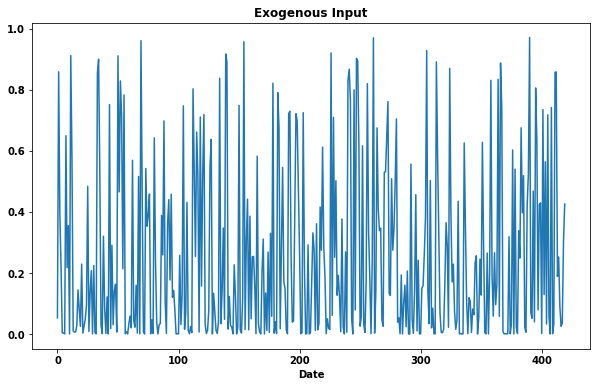

In [106]:
# SARIMA-X model is similar to SARIMA, the only difference being the presence of an exogenous input. For demonstration
# purposes, since there is no exogenous input in this particular Electricity Production dataset, an exogenous input has
#  been generated, that is based on a random uniform distribution 
plt.figure(figsize=(10,6))
plt.plot(exo)
plt.xlabel('Date',fontweight='bold')
plt.title('Exogenous Input',fontweight='bold');

In [108]:
# SARIMAX for fitting the first 372 samples based the exogenous input and on the previously estimated order values
model = sm.tsa.statespace.SARIMAX(fit[:372],order=(1, 1, 3),exog=exo[:372],seasonal_order=(1,1,3,12))
SARIMAX_Model = model.fit()


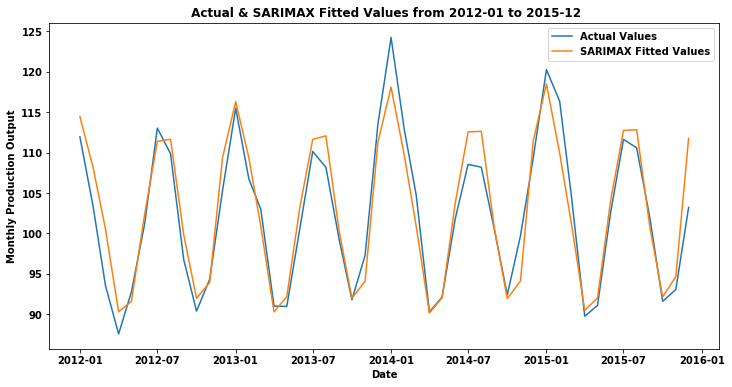

In [109]:
# To observe how well the SARIMAX model has fitted the data, the last 48 Monthly_Prod_Out values(from 2012-01 to 2015-12) 
# of the actual data and the SARIMAX fitted values are plotted below.
sarimax_last_4_year_fitted_val=SARIMAX_Model.predict(start=324,end=371,exog=exo[324:372],dynamic=True) 
plt.figure(figsize=(12,6))
plt.plot(fit[324:],label='Actual Values')
plt.plot(sarimax_last_4_year_fitted_val,label='SARIMAX Fitted Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' Actual & SARIMAX Fitted Values from 2012-01 to 2015-12',fontweight='bold')
plt.legend();

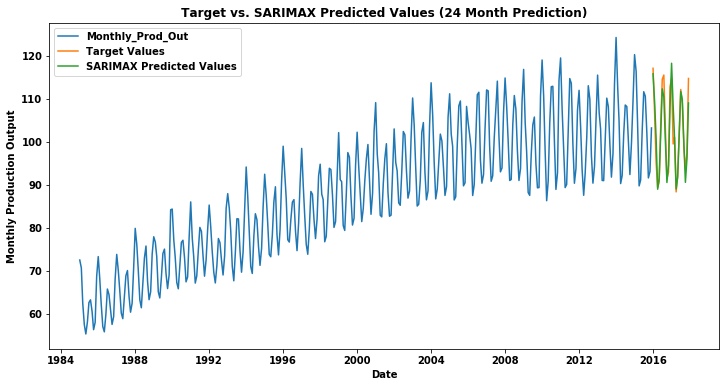

In [110]:
# To observe how accurate the SARIMAX model can forecast the test 'Monthly_Prod_Out' values (target data), 
# the test data (24 months) and the SARIMAX forecasted values are plotted below.
exogen=exo[372:396].reshape((24,1))
SARIMAX_Prediction=SARIMAX_Model.predict(start=372,end=395,exog=exogen,dynamic=True)
# Plot of actual vs. SARIMA fitted values 
plt.figure(figsize=(12,6))
plt.plot(fit,label='Monthly_Prod_Out')
plt.plot(test,label='Target Values')
plt.plot(SARIMAX_Prediction,label='SARIMAX Predicted Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' Target vs. SARIMAX Predicted Values (24 Month Prediction) ',fontweight='bold')
plt.legend();

In [111]:
# Root Mean Squared Error of target and predicted values
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test,SARIMAX_Prediction))
RMSE

3.204890085524021

In [112]:
# SARIMAX Prediction Error summary statistics
SARIMAX_Prediction=SARIMAX_Prediction.values.reshape((24,1))
SARIMAX_pred_error_RMSE=np.sqrt((test.values-SARIMAX_Prediction)**2)
SARIMAX_pred_error_RMSE=pd.DataFrame(SARIMAX_pred_error_RMSE,columns=['SARIMAX Pred_Error'])
SARIMAX_pred_error_RMSE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SARIMAX Pred_Error,24.0,2.350629,2.225355,0.141188,0.717999,1.478201,3.133429,8.90323


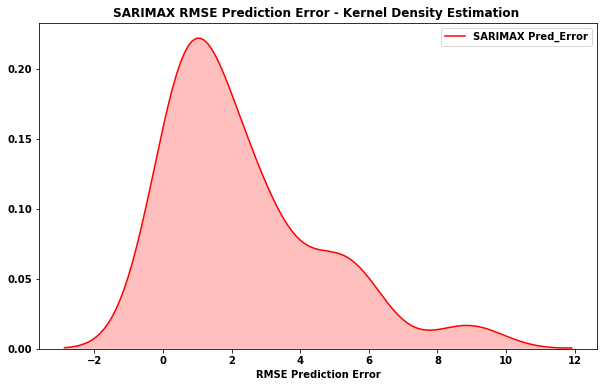

In [113]:
# SARIMAX Prediction Error Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(SARIMAX_pred_error_RMSE['SARIMAX Pred_Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('RMSE Prediction Error',fontweight='bold')
plt.title('SARIMAX RMSE Prediction Error - Kernel Density Estimation ',fontweight='bold');

In [115]:
# SARIMAX for fitting all dataset samples based on the exogenous input and on the previously estimated order values
model = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 3),exog=exo[:396],seasonal_order=(1,1,3,12))
SARIMAX_Model = model.fit()


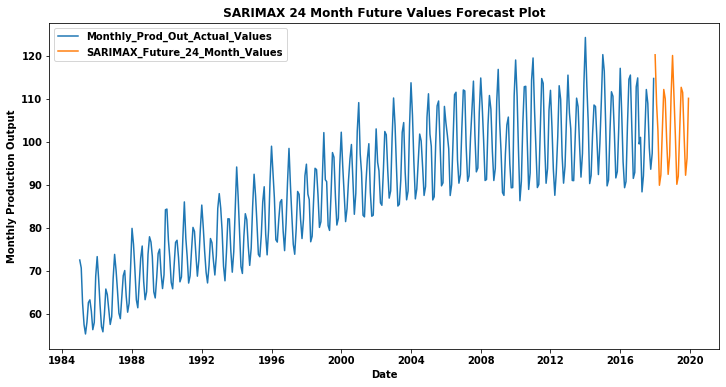

In [117]:
# To observe the future 2 Year behavior of the time series (No test data) the SARIMAX model can be employed to forecast 
# the future 24 month values of the Monthly Electricity Production Output.
exogenous=exo[396:].reshape((24,1))
SARIMAX_Forecast=SARIMAX_Model.predict(start=396,end=419,exog=exogenous,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(data,label='Monthly_Prod_Out_Actual_Values')
plt.plot(SARIMAX_Forecast,label='SARIMAX_Future_24_Month_Values')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Monthly Production Output',fontweight='bold')
plt.title(' SARIMAX 24 Month Future Values Forecast Plot ',fontweight='bold')
plt.legend();